In [1]:
# imports
import numpy as np
import SimpleITK as sitk

In [2]:
# read image
image_path = '../data/po/out_nerka_Moving2_SPLINE.mhd'
image = sitk.ReadImage(image_path, sitk.sitkFloat32)
image

<SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'std::vector< itk::simple::Image >::value_type *' at 0x103cb7c30> >

In [4]:
# view image
viewer = sitk.ImageViewer()
# set slicer as viewing application for mac
command = '/Applications/Slicer.app/Contents/MacOS/Slicer'
viewer.SetCommand(command)
viewer.Execute(image)


In [ ]:
# read transform
transform_file = '../data/po/TOTAL.mat'
transform = sitk.ReadTransform(transform_file)
transform

In [5]:
# apply mask to image
seg = sitk.ReadImage('../data/po/TOTAL.mhd')
viewer.Execute(sitk.LabelOverlay(image, seg))

Switch to module:  "Welcome"
Local filepath received via command-line:  "/tmp/TempFile-86134-0.mha"
Loaded volume from file: /tmp/TempFile-86134-0.mha. Dimensions: 294x195x159. Number of components: 1. Pixel type: float.


"Volume" Reader has successfully read the file "/tmp/TempFile-86134-0.mha" "[0.22s]"
Switch to module:  "Welcome"
Local filepath received via command-line:  "/tmp/TempFile-86134-1.mha"
Loaded volume from file: /tmp/TempFile-86134-1.mha. Dimensions: 294x195x159. Number of components: 3. Pixel type: float.


"Volume" Reader has successfully read the file "/tmp/TempFile-86134-1.mha" "[0.60s]"
Switch to module:  ""
Switch to module:  ""
Switch to module:  ""
Switch to module:  ""


In [6]:
seg_arr = sitk.GetArrayFromImage(seg)
np.unique(seg_arr)

array([0, 1, 2, 3, 4], dtype=uint16)

In [7]:
mask = seg == 1
viewer.Execute(sitk.LabelOverlay(image, mask))

Switch to module:  "Welcome"
Local filepath received via command-line:  "/tmp/TempFile-86134-2.mha"
Loaded volume from file: /tmp/TempFile-86134-2.mha. Dimensions: 294x195x159. Number of components: 3. Pixel type: float.


"Volume" Reader has successfully read the file "/tmp/TempFile-86134-2.mha" "[0.41s]"
Switch to module:  ""
Switch to module:  ""


0 = background

1 = kidneys themselves

2 = fluid in kidneys?

3 = not interesting I guess

4 = nonsense

In [8]:
img_arr = sitk.GetArrayFromImage(image)
img_arr.shape

(159, 195, 294)

1. wymiar: góra dół
2. wymiar: przód tył
3. wymiar: od boku do boku

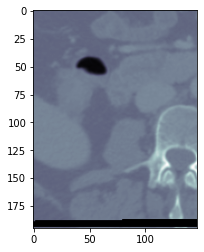

In [9]:
import matplotlib.pyplot as plt

plt.imshow(img_arr[100,:,:147], cmap='bone')

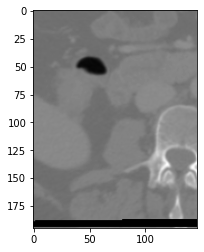

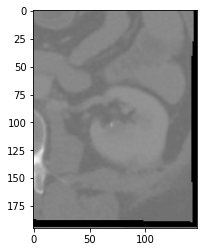

In [10]:
half = img_arr.shape[2] // 2

left_half = img_arr[:,:,:half]
right_half = img_arr[:,:,half:]

seg_arr = sitk.GetArrayFromImage(seg)
left_seg = seg_arr[:,:,:half]
right_seg = seg_arr[:,:,half:]

plt.imshow(left_half[100], cmap='gray')
plt.show()
plt.imshow(right_half[100], cmap='gray')
plt.show()

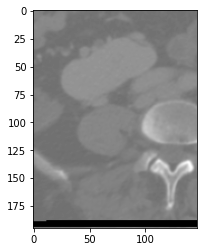

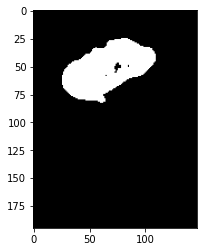

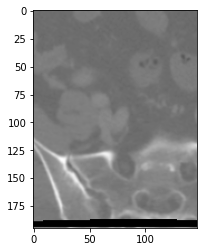

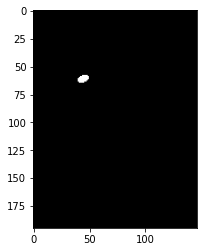

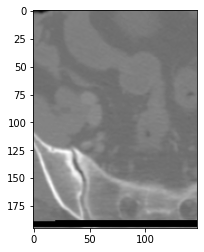

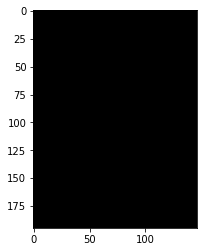

In [11]:
max_idx = None
first_idx = 158
last_idx = 0
max_counts = 0

for idx, seg_slice in enumerate(left_seg):
    mask = seg_slice == 1
    _, counts = np.unique(mask, return_counts=True)
    if len(counts) > 1 and counts[1] > max_counts:
        max_counts = counts[1]
        max_idx = idx
        if idx < first_idx:
            first_idx = idx
        if idx > max_idx:
            last_idx = idx

plt.imshow(left_half[max_idx, :, :], cmap='gray')
plt.show()
plt.imshow(left_seg[max_idx, :, :] == 1, cmap='gray')
plt.show()

plt.imshow(left_half[first_idx, :, :], cmap='gray')
plt.show()
plt.imshow(left_seg[first_idx, :, :] == 1, cmap='gray')
plt.show()

plt.imshow(left_half[last_idx, :, :], cmap='gray')
plt.show()
plt.imshow(left_seg[last_idx, :, :] == 1, cmap='gray')
plt.show()